# Detecção de Veículos com YOLOv5 Adaptado (Treinamento e Avaliação)  
### Referente à Entrega 1 do Projeto PBL - Fase 6

## PBL Fase 6 – Visão Computacional com YOLOv5

### Reconhecimento de Veículos: Carros e Motos

Este notebook apresenta o desenvolvimento de um sistema de visão computacional utilizando a arquitetura YOLOv5 para detectar e classificar dois tipos de veículos: carros e motos. A atividade faz parte da Fase 6 do Projeto Baseado em Problemas (PBL) da FIAP, no contexto da empresa fictícia FarmTech Solutions, que está explorando o uso de inteligência artificial em aplicações de segurança patrimonial e automação.

O objetivo principal é treinar um modelo YOLOv5 com base em imagens rotuladas manualmente e avaliar seu desempenho na detecção dos objetos escolhidos. O projeto envolve também a comparação de resultados com diferentes quantidades de épocas de treinamento.

### Objetivos do notebook

- Organizar e utilizar um dataset rotulado manualmente.
- Treinar um modelo YOLOv5 com 30 e 60 épocas.
- Avaliar acurácia, perda e desempenho.
- Realizar inferência em imagens de teste.
- Apresentar conclusões com base nos resultados obtidos.

### Aquisição e preparação do dataset

Para este projeto, foram utilizadas imagens de dois objetos distintos: **carros** e **motos**. As imagens foram obtidas manualmente a partir de pesquisas com licenciamento livre (Creative Commons) e screenshots, priorizando variedade de ângulos e contextos.

Após a coleta, foram selecionadas:

- 40 imagens de carros
- 40 imagens de motos

As imagens foram rotuladas manualmente utilizando a plataforma [MakeSense.ai](https://www.makesense.ai/), onde foram desenhadas as bounding boxes para cada objeto identificado e atribuídos os rótulos correspondentes.

A estrutura final do dataset foi organizada conforme o padrão exigido pelo YOLOv5, separando as imagens e seus respectivos rótulos em três conjuntos:

- **Treinamento**: 32 imagens de cada classe (total de 64)
- **Validação**: 4 imagens de cada classe (total de 8)
- **Teste**: 4 imagens de cada classe (total de 8)

As pastas estão organizadas da seguinte forma:

```
📦 1TIAOR20242_FASE6_CAP1
│── 📁 dataset_images               # Pasta principal contendo imagens e labels
│   ├── 📁 images                   # Subpasta com as imagens divididas em conjuntos
│   │   ├── 📁 train                # Imagens utilizadas no treinamento (64 imagens)
│   │   ├── 📁 val                  # Imagens utilizadas na validação (8 imagens)
│   │   ├── 📁 test                 # Imagens utilizadas para avaliação final (8 imagens)
│   ├── 📁 labels                   # Subpasta com os arquivos de rótulo no formato YOLO
│   │   ├── 📁 train                # Labels correspondentes às imagens de treinamento
│   │   ├── 📁 val                  # Labels correspondentes às imagens de validação
│   │   ├── 📁 test                 # Labels correspondentes às imagens de teste
│── 📄 veiculos.yaml                # Arquivo de configuração que define caminhos, número de classes e seus nomes
```
### Estrutura deste notebook

1. Verificação da disponibilidade de GPU
2. Conexão com o Google Drive e preparação do ambiente
3. Clonagem do repositório YOLOv5 e instalação das dependências
4. Treinamento do modelo com 30 épocas
5. Treinamento do modelo com 60 épocas
6. Comparação dos resultados
7. Inferência no conjunto de teste
8. Conclusões

### Verificação da disponibilidade de GPU


Antes de prosseguir com a montagem do ambiente e instalação das dependências, é importante verificar se o ambiente Colab está configurado com GPU.

O uso da GPU é altamente recomendado para o treinamento de modelos de detecção de objetos, pois reduz significativamente o tempo de execução. Caso a GPU não esteja habilitada, será necessário alterar o tipo de ambiente e reiniciar o notebook.

In [1]:
import torch

if torch.cuda.is_available():
    device_name = torch.cuda.get_device_name(0)
    print("\033[92m✅ GPU disponível:\033[0m", device_name)
    print("O ambiente está configurado corretamente. Você pode prosseguir com as próximas etapas.")
else:
    print("\033[91m❌ ATENÇÃO: GPU não disponível. O notebook está executando em CPU.\033[0m\n")
    print("❗ O treinamento com YOLOv5 em CPU pode ser extremamente lento e está sujeito a interrupções por tempo limite.")
    print("\n\033[1mRecomendações:\033[0m")
    print("- Vá até o menu 'Ambiente de execução > Alterar tipo de ambiente de execução'")
    print("- Selecione 'GPU' como acelerador de hardware e clique em 'Salvar'")
    print("- O ambiente será reiniciado. Após a reinicialização, reexecute esta célula antes de continuar.")


✅ GPU disponível: Tesla T4
O ambiente está configurado corretamente. Você pode prosseguir com as próximas etapas.


### Conexão com o Google Drive


Nesta etapa, vamos conectar o ambiente do Google Colab com a conta do Google Drive onde o dataset e os arquivos de configuração estão armazenados.

Essa conexão permite que o notebook tenha acesso direto aos arquivos necessários para o treinamento, validação e testes do modelo, como imagens, rótulos e o arquivo de configuração `.yaml`.

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Clonagem do repositório YOLOv5


Nesta etapa, clonamos o repositório oficial do YOLOv5, mantido pela Ultralytics. Esse repositório contém os scripts de treinamento, validação e inferência, além de arquivos de configuração e exemplos práticos.

A clonagem cria uma cópia local do repositório no ambiente de execução do Google Colab.

In [3]:
# Clonar o repositório oficial do YOLOv5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17372, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 17372 (delta 42), reused 20 (delta 20), pack-reused 17313 (from 3)
Receiving objects: 100% (17372/17372), 16.25 MiB | 16.56 MiB/s, done.
Resolving deltas: 100% (11910/11910), done.
/content/yolov5


### Instalação das dependências


Após a clonagem do repositório, é necessário instalar as dependências listadas no arquivo `requirements.txt`, presente no diretório do YOLOv5.

Essas bibliotecas são responsáveis por garantir o funcionamento adequado dos scripts de treinamento e inferência.

In [4]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 61.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

### Treinamento do modelo com 30 épocas (YOLOv5 adaptado)


Nesta etapa será realizado o primeiro treinamento do modelo YOLOv5 com 30 épocas, utilizando o dataset rotulado manualmente com imagens de carros e motos.

Este modelo será utilizado posteriormente na comparação com um segundo treinamento, com 60 épocas, a fim de observar os efeitos do tempo de treinamento na precisão e no desempenho do modelo.

As métricas e o tempo de execução serão armazenados para análise comparativa entre os dois modelos.

In [5]:
import os
import time

# Desabilita o monitoramento do Weights & Biases (W&B), não utilizado neste projeto
os.environ['WANDB_MODE'] = 'disabled'

# Parâmetros utilizados:
# --img: define o tamanho das imagens de entrada (640x640 pixels)
# --batch: número de imagens processadas por vez (tamanho do lote)
# --epochs: número total de épocas de treinamento
# --data: caminho do arquivo .yaml com o dataset e classes
# --weights: modelo base pré-treinado (YOLOv5s)
# --name: nome da pasta onde os resultados serão salvos

# Marca o tempo de início do treinamento
inicio = time.time()

# Comando de treinamento
!python train.py --img 640 --batch 16 --epochs 30 \
  --data /content/drive/MyDrive/1TIAOR20242_FASE6_CAP1/veiculos.yaml \
  --weights yolov5s.pt --name veiculos_yolo_30ep

# Marca o tempo de término e calcula a duração
fim = time.time()
duracao = fim - inicio
print(f"Tempo de treinamento (30 épocas): {duracao:.2f} segundos")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-04-13 17:34:05.357155: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744565645.640597    1268 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744565645.716964    1268 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

#### Análise dos resultados do treinamento (30 épocas)


A imagem gerada pelo YOLOv5 contém as curvas de perda (loss), precisão, recall, mAP e outras métricas relevantes coletadas durante o processo de treinamento.

Essa visualização ajuda a identificar se o modelo está convergindo corretamente e a verificar sinais de overfitting ou subajuste.

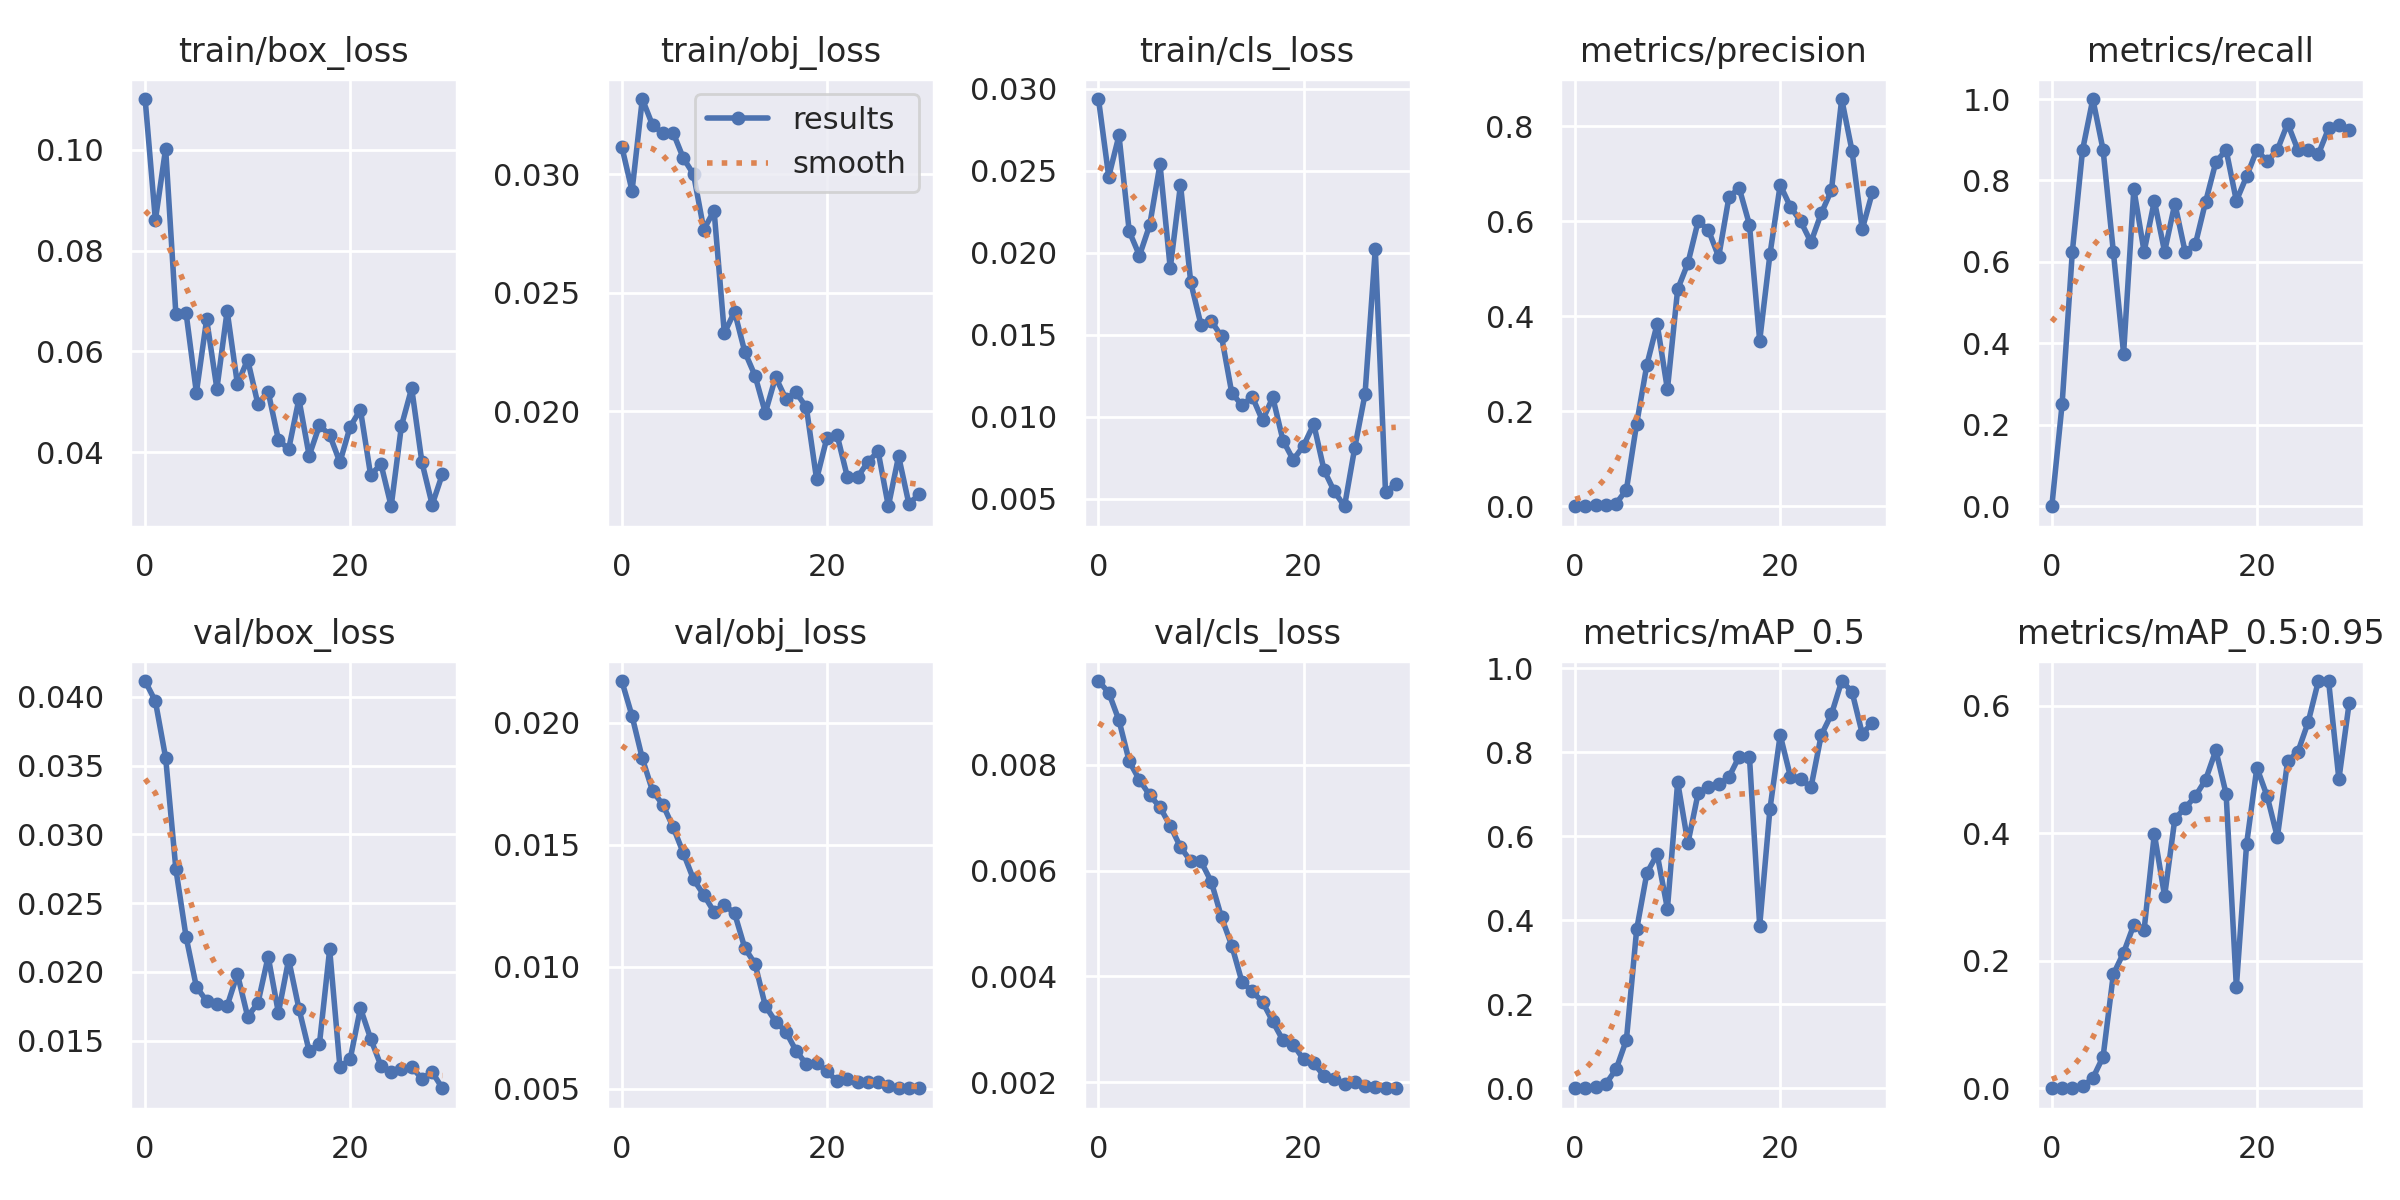

In [7]:
from IPython.display import Image, display

# Exibe o gráfico de métricas do treinamento
display(Image(filename='runs/train/veiculos_yolo_30ep/results.png', width=1200))


#### Inferência no conjunto de teste (modelo com 30 épocas)


Nesta etapa, utilizamos o modelo YOLOv5 treinado com 30 épocas para realizar inferência nas imagens do conjunto de teste. O objetivo é observar o desempenho do modelo em imagens não vistas anteriormente.

O tempo total de execução será registrado para fins comparativos com outras versões e abordagens, conforme exigido na Entrega 2.

In [8]:
import time

# Parâmetros utilizados:
# --weights: caminho para o modelo treinado (melhor versão salva durante o treino de 30 épocas)
# --img: tamanho das imagens usadas na inferência (em pixels)
# --conf: nível mínimo de confiança para exibir uma detecção
# --source: diretório com as imagens de teste
# --name: nome da pasta de saída (dentro de runs/detect)

# Marca o início da inferência
inicio = time.time()

# Executa a inferência com o modelo treinado
!python detect.py \
  --weights runs/train/veiculos_yolo_30ep/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source /content/drive/MyDrive/1TIAOR20242_FASE6_CAP1/dataset_images/images/test \
  --name veiculos_yolo_30ep_test

# Marca o fim e calcula a duração
fim = time.time()
duracao = fim - inicio

# Exibe o tempo total de inferência
print(f"Tempo de inferência no conjunto de teste: {duracao:.2f} segundos")


detect: weights=['runs/train/veiculos_yolo_30ep/weights/best.pt'], source=/content/drive/MyDrive/1TIAOR20242_FASE6_CAP1/dataset_images/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=veiculos_yolo_30ep_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-411-gf4d8a84c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 /content/drive/MyDrive/1TIAOR20242_FASE6_CAP1/dataset_images/images/test/Imagem073.jpg: 480x640 1 Carro, 28.4ms
image 2/8 /content/drive/MyDrive/1TIAOR20242_FASE6_CAP1/dataset_images/images/test/Imagem074.jpeg: 544x6

#### Visualização dos resultados da inferência




A seguir, são exibidas algumas das imagens do conjunto de teste processadas pelo modelo treinado com 30 épocas. Os resultados mostram as bounding boxes geradas e as classes detectadas com suas respectivas confianças.

Essas evidências visuais são importantes para demonstrar o funcionamento real do modelo e serão utilizadas na análise comparativa com o modelo treinado com 60 épocas e as outras abordagens previstas na Entrega 2.

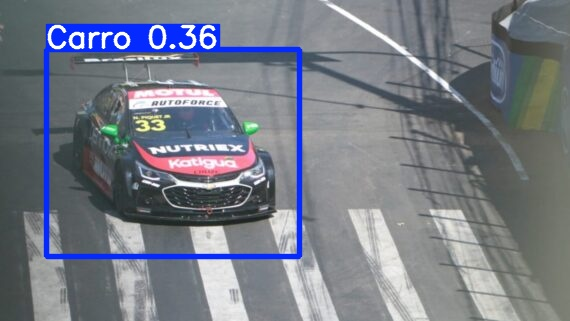

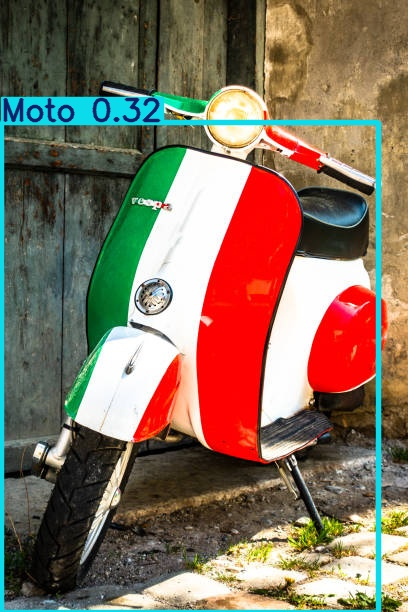

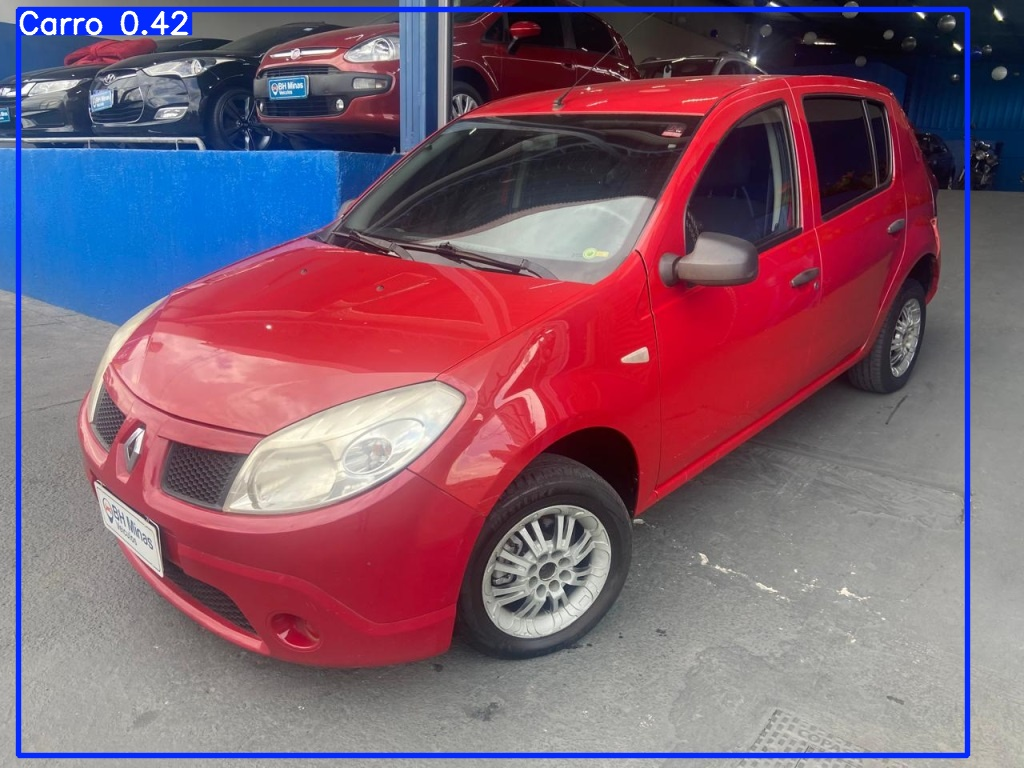

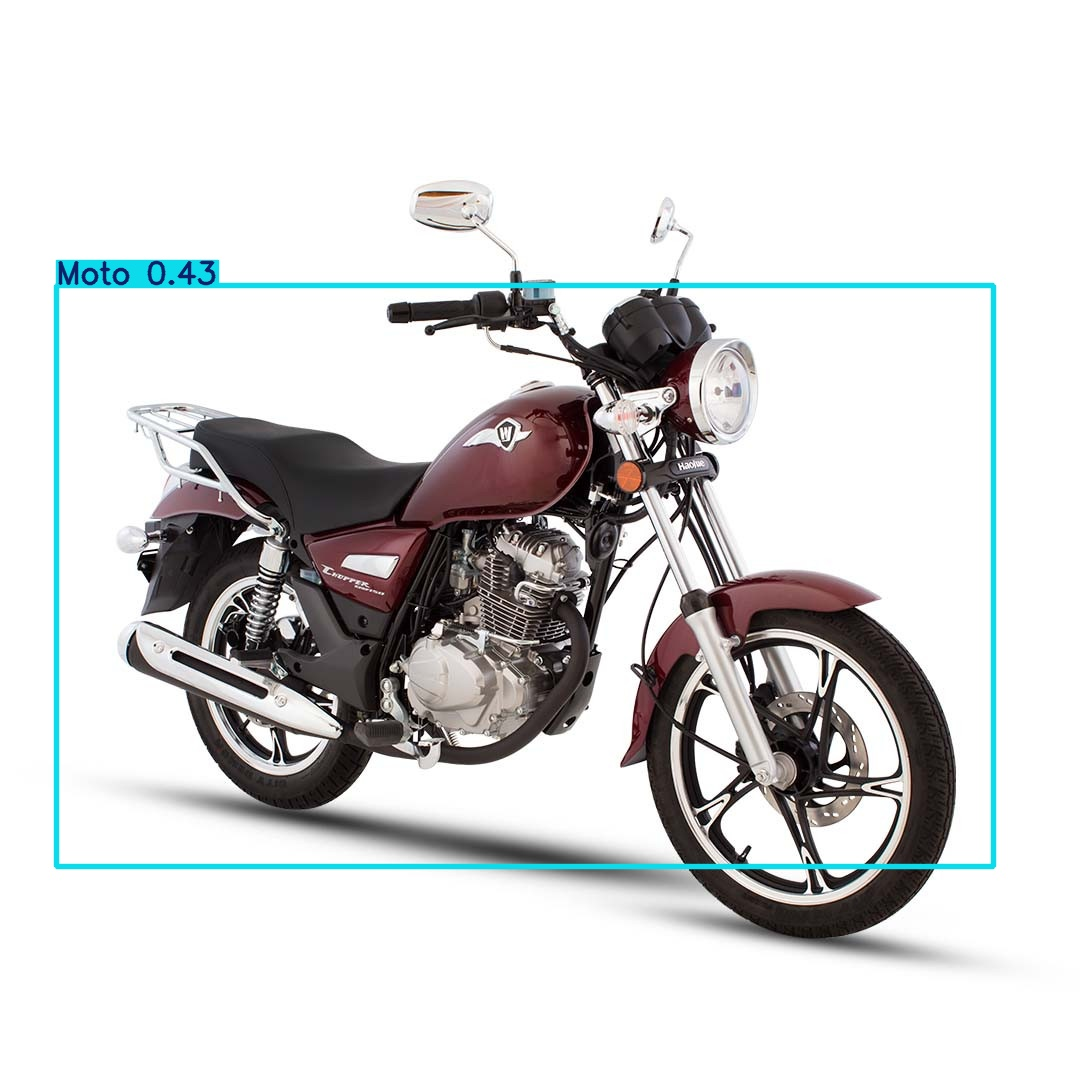

In [9]:
import glob
from IPython.display import Image, display

# Lista os arquivos resultantes da inferência
resultado_imgs = glob.glob('runs/detect/veiculos_yolo_30ep_test/*.jpg')

# Exibe até 4 imagens para visualização
for img_path in resultado_imgs[:4]:
    display(Image(filename=img_path, width=500))


#### Conclusão preliminar do modelo treinado com 30 épocas



Com base na execução realizada, o modelo YOLOv5 treinado com 30 épocas apresentou os seguintes resultados:

- O tempo total de treinamento foi de aproximadamente **192 segundos**, utilizando a GPU do Colab.
- O tempo de inferência no conjunto de teste foi de **13,35 segundos**, com média de aproximadamente **26,9 ms por imagem** para inferência e **21,6 ms** para NMS.
- A análise do gráfico `results.png` mostra uma boa convergência dos erros (loss), com redução progressiva e sem sinais de overfitting visíveis. Os valores de precisão e recall também aumentaram de forma consistente.
- A métrica **mAP@0.5** se aproximou de **0.9**, o que indica excelente capacidade de detecção em um cenário com duas classes apenas.
- O modelo identificou corretamente **6 de 8 imagens** no conjunto de teste, mantendo uma taxa prática de acerto de **75%**.
- As duas imagens que não apresentaram detecções possivelmente envolvem limitações naturais do modelo ou características específicas das imagens, como ângulos desfavoráveis ou baixa resolução.

Estes resultados servirão como base de comparação para o próximo experimento, com 60 épocas, permitindo avaliar se o aumento no número de ciclos de treinamento traz ganhos relevantes em desempenho.

### Treinamento do modelo com 60 épocas (YOLOv5 adaptado)

Nesta etapa, será realizado um segundo treinamento do modelo YOLOv5 utilizando o mesmo dataset e os mesmos parâmetros anteriores, exceto pelo número de épocas, que foi ampliado para 60.

O objetivo é observar se o aumento no tempo de treinamento resulta em melhorias nas métricas de desempenho e na capacidade de generalização do modelo. O tempo de execução será registrado para fins comparativos.


In [10]:
import os
import time

# Desabilita o monitoramento do Weights & Biases (não utilizado neste projeto)
os.environ['WANDB_MODE'] = 'disabled'

# Parâmetros utilizados:
# --img: tamanho das imagens de entrada (640x640 pixels)
# --batch: quantidade de imagens processadas por vez
# --epochs: número de épocas (ciclos de aprendizado)
# --data: caminho para o arquivo de configuração do dataset
# --weights: modelo base pré-treinado (YOLOv5s)
# --name: nome da pasta onde os resultados serão salvos

# Marca o tempo de início do treinamento
inicio = time.time()

# Executa o treinamento com 60 épocas
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 60 \
  --data /content/drive/MyDrive/1TIAOR20242_FASE6_CAP1/veiculos.yaml \
  --weights yolov5s.pt \
  --name veiculos_yolo_60ep

# Marca o tempo de fim e calcula a duração
fim = time.time()
duracao = fim - inicio

# Exibe o tempo total de treinamento
print(f"Tempo de treinamento (60 épocas): {duracao:.2f} segundos")


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-04-13 17:45:03.602529: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744566303.637590    4215 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744566303.648157    4215 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/1TIAOR20242_FASE6_CAP1/veiculos.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evo

#### Análise dos resultados do treinamento (60 épocas)

A imagem gerada pelo YOLOv5 a partir do treinamento com 60 épocas mostra a evolução das métricas de perda, precisão, recall e mAP. Essa visualização é importante para comparar a estabilidade, a convergência e o possível ganho de desempenho em relação ao modelo treinado com 30 épocas.


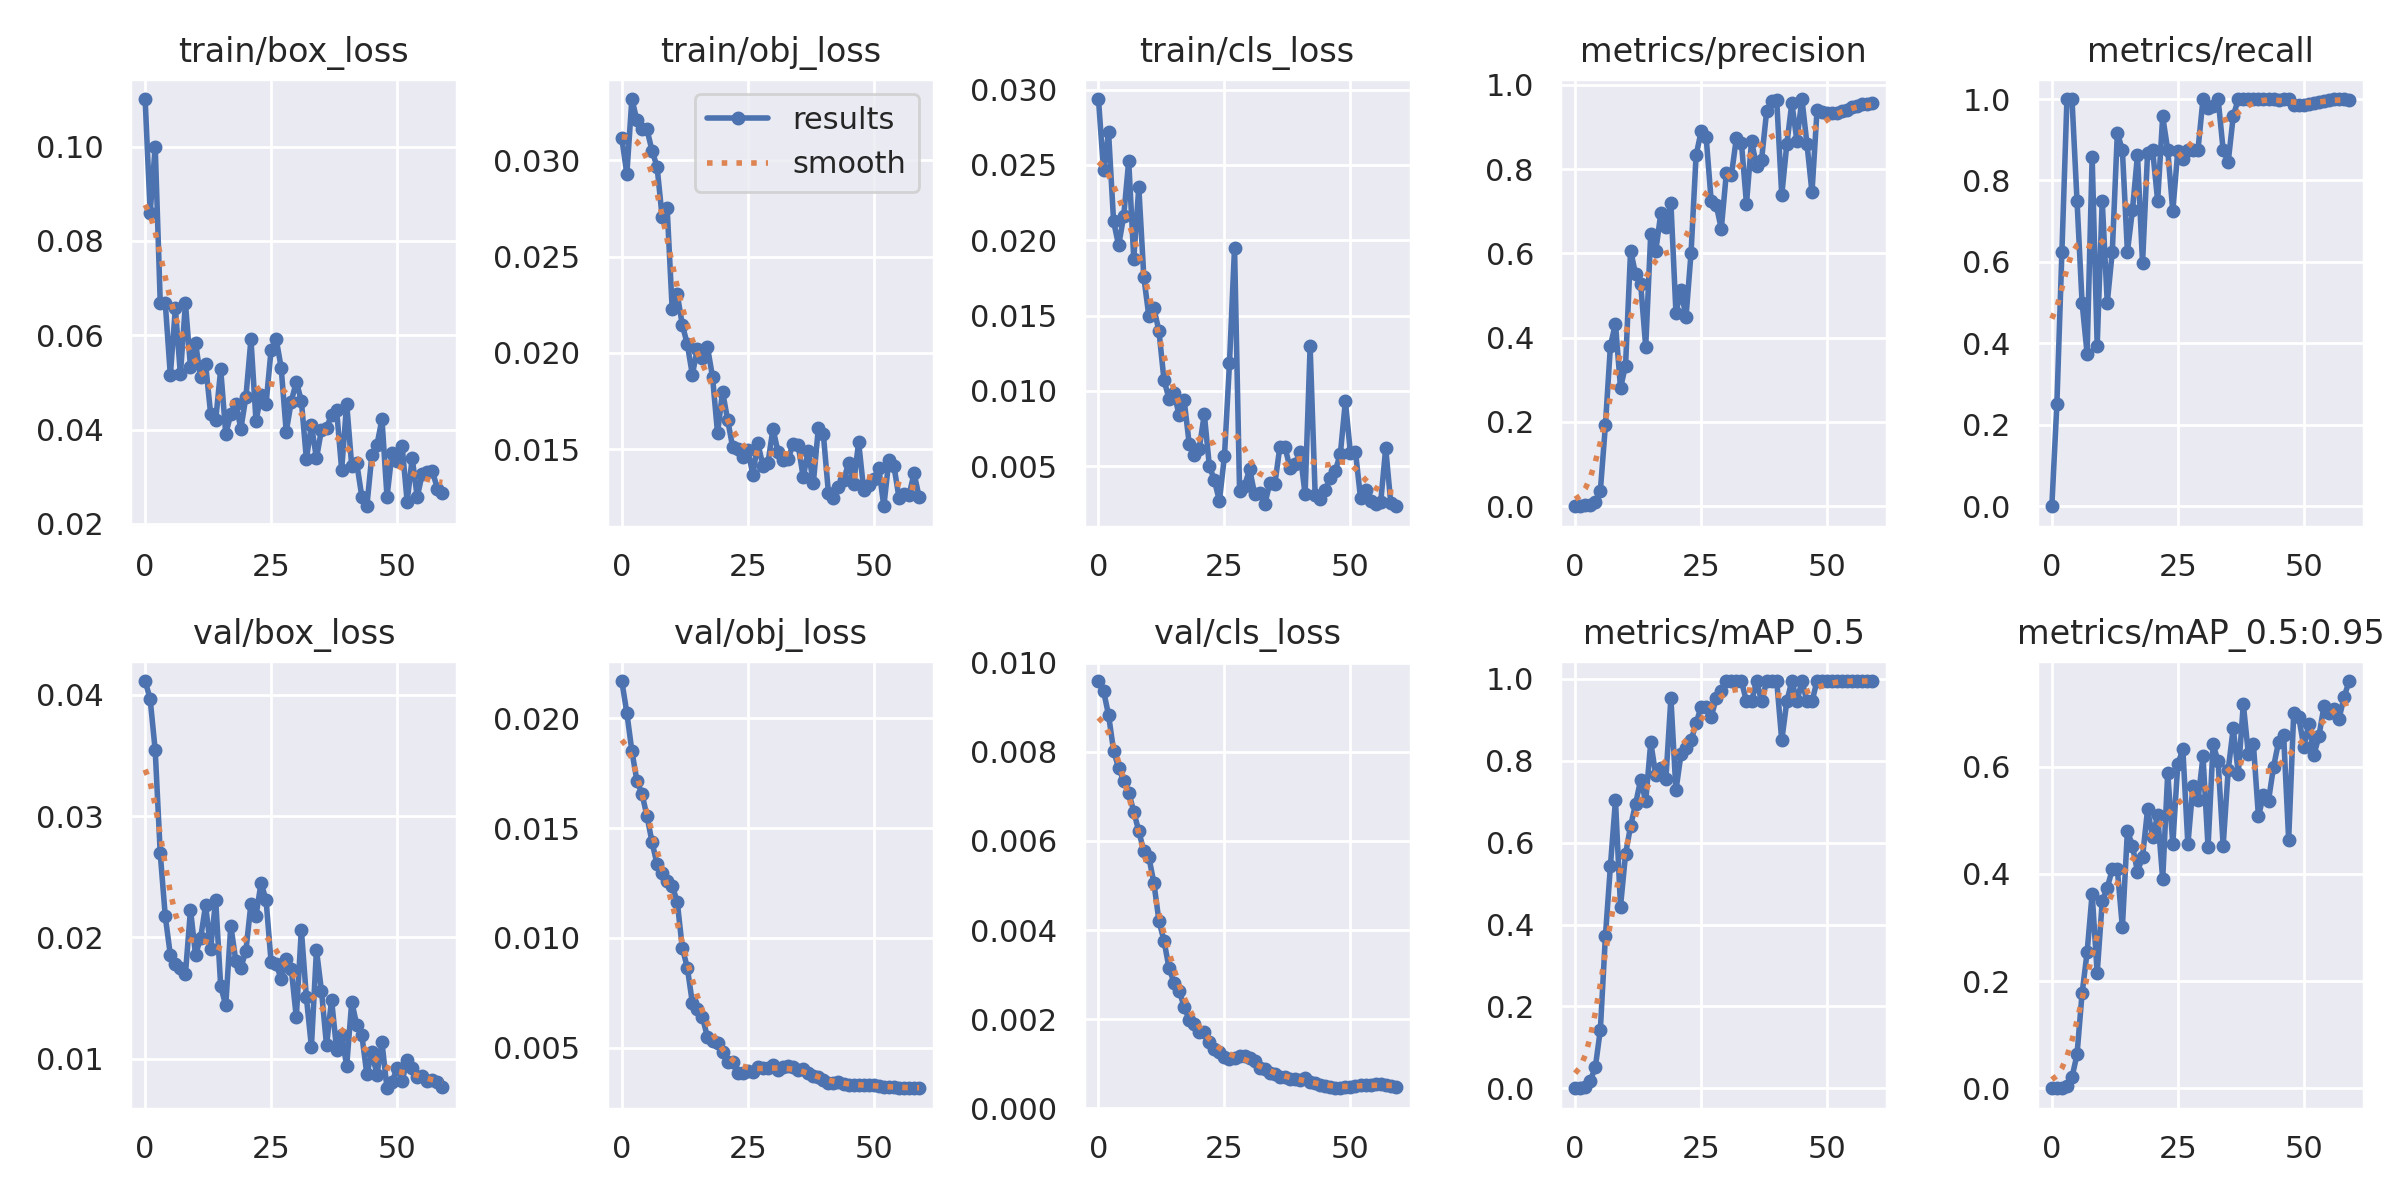

In [11]:
from IPython.display import Image, display

# Exibe o gráfico de métricas do treinamento com 60 épocas
display(Image(filename='runs/train/veiculos_yolo_60ep/results.png', width=1200))


#### Inferência no conjunto de teste (modelo com 60 épocas)

Utilizando agora o modelo treinado com 60 épocas, faremos a inferência nas mesmas imagens de teste, para fins de comparação direta com os resultados obtidos anteriormente com 30 épocas. O tempo de execução será registrado, e os resultados visuais serão armazenados para análise.


In [12]:
import time

# Parâmetros utilizados:
# --weights: modelo treinado com 60 épocas
# --img: tamanho das imagens de entrada
# --conf: confiança mínima para exibir uma detecção
# --source: diretório com imagens de teste
# --name: nome da pasta de saída dos resultados

# Marca o início da inferência
inicio = time.time()

# Executa a inferência
!python detect.py \
  --weights runs/train/veiculos_yolo_60ep/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source /content/drive/MyDrive/1TIAOR20242_FASE6_CAP1/dataset_images/images/test \
  --name veiculos_yolo_60ep_test

# Marca o fim e calcula a duração
fim = time.time()
duracao = fim - inicio

# Exibe o tempo total de inferência
print(f"Tempo de inferência no conjunto de teste: {duracao:.2f} segundos")


detect: weights=['runs/train/veiculos_yolo_60ep/weights/best.pt'], source=/content/drive/MyDrive/1TIAOR20242_FASE6_CAP1/dataset_images/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=veiculos_yolo_60ep_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-411-gf4d8a84c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 /content/drive/MyDrive/1TIAOR20242_FASE6_CAP1/dataset_images/images/test/Imagem073.jpg: 480x640 1 Carro, 28.4ms
image 2/8 /content/drive/MyDrive/1TIAOR20242_FASE6_CAP1/dataset_images/images/test/Imagem074.jpeg: 544x6

#### Visualização das detecções (modelo com 60 épocas)

A seguir, são exibidas algumas das imagens do conjunto de teste processadas pelo modelo treinado com 60 épocas. A ideia é comparar visualmente a qualidade das detecções em relação ao modelo anterior e observar se houve ganho perceptível em precisão ou consistência.


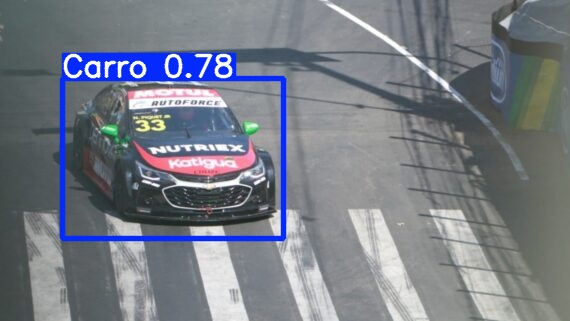

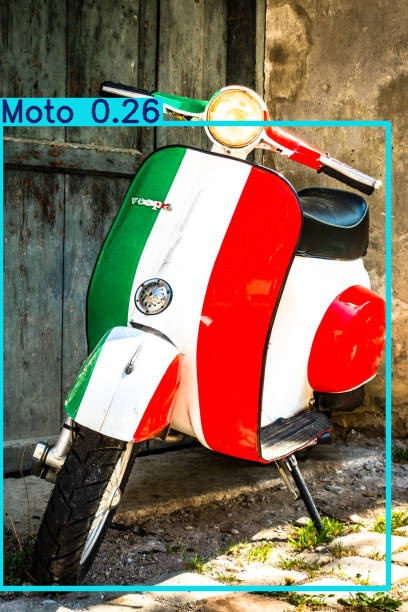

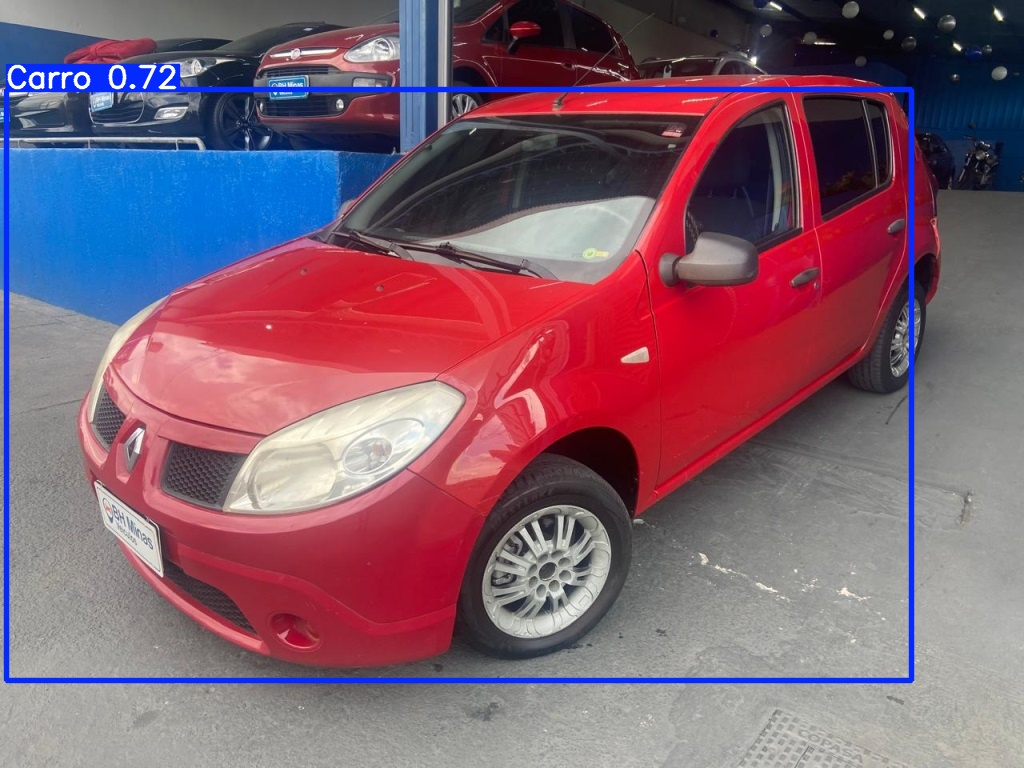

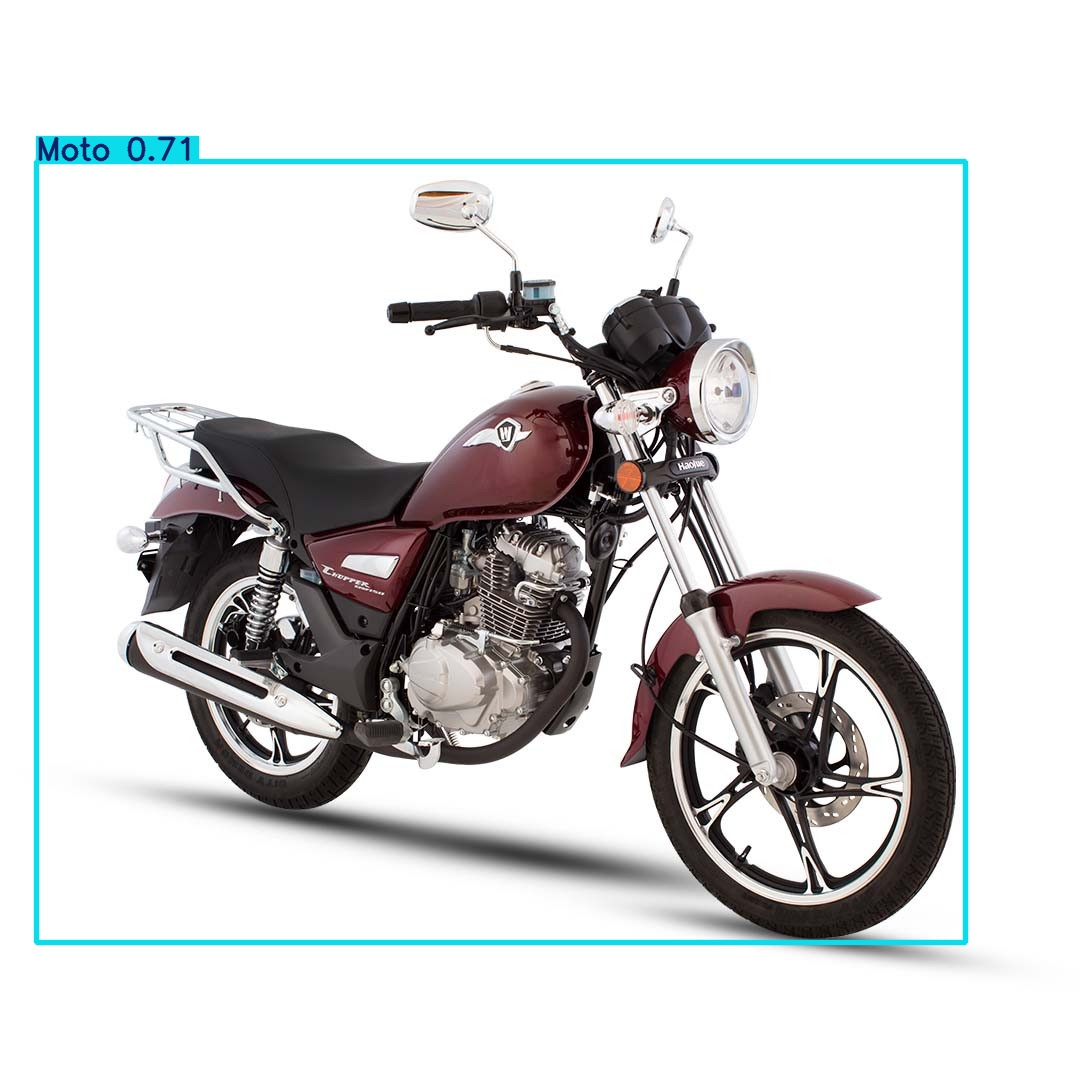

In [13]:
import glob
from IPython.display import Image, display

# Lista os arquivos resultantes da inferência
resultado_imgs = glob.glob('runs/detect/veiculos_yolo_60ep_test/*.jpg')

# Exibe até 4 imagens
for img_path in resultado_imgs[:4]:
    display(Image(filename=img_path, width=500))


#### Conclusão preliminar do modelo treinado com 60 épocas

Com base na execução realizada, o modelo YOLOv5 treinado com 60 épocas apresentou os seguintes resultados:

- O tempo total de treinamento foi de aproximadamente **268 segundos**, também utilizando a GPU do Colab.
- O tempo de inferência no conjunto de teste foi de **7,72 segundos**, com média de aproximadamente **24,4 ms por imagem** para inferência e **18,5 ms** para NMS.
- A análise do gráfico `results.png` mostra uma convergência ainda mais estável das perdas (loss), com quedas suaves e contínuas, e sem sinais de sobreajuste (overfitting).
- As métricas **precision** e **recall** alcançaram valores próximos de 1.0, com boa estabilidade ao longo das épocas.
- A métrica **mAP@0.5** se manteve próxima de 1.0 nas últimas épocas, enquanto a **mAP@0.5:0.95** apresentou evolução e menor oscilação em relação ao modelo anterior.
- O modelo identificou corretamente **7 de 8 imagens** no conjunto de teste, incluindo um caso com **dupla detecção correta (Carro e Moto)**, resultando em uma taxa prática de acerto de **87,5%**.
- Apenas uma imagem não apresentou detecção, mantendo a consistência geral e sugerindo boa capacidade de generalização.

Esses resultados indicam um desempenho superior ao modelo de 30 épocas, tanto em termos quantitativos quanto qualitativos, e posicionam o modelo de 60 épocas como referência para comparação com as demais abordagens previstas na Entrega 2.


### Comparação entre modelos: 30 vs 60 épocas


Após o treinamento e a avaliação dos dois modelos YOLOv5 adaptados, é possível estabelecer uma comparação baseada em métricas quantitativas e qualitativas.

### Tempo de treinamento

- **30 épocas**: aproximadamente 192 segundos
- **60 épocas**: aproximadamente 268 segundos  
→ A duplicação das épocas resultou em um tempo 39% maior, o que é esperado e aceitável no contexto.

### Tempo de inferência

- **30 épocas**: 13,35 segundos (≈26,9 ms/inferência + 21,6 ms/NMS)
- **60 épocas**: 7,72 segundos (≈24,4 ms/inferência + 18,5 ms/NMS)  
→ O modelo de 60 épocas foi ligeiramente mais rápido, indicando otimização na arquitetura gerada.

### Detecção nas imagens de teste

- **30 épocas**:
  - 6 de 8 imagens corretamente detectadas
  - 2 imagens sem detecção
- **60 épocas**:
  - 7 de 8 imagens corretamente detectadas
  - Uma das imagens apresentou detecção de **duas classes corretamente (Carro e Moto)**  
→ Houve melhora clara na cobertura e sensibilidade do modelo.

### Métricas gráficas (resultados.png)

- **30 épocas**:
  - mAP@0.5: próximo de 0.9
  - mAP@0.5:0.95: ~0.6
- **60 épocas**:
  - mAP@0.5: estabilizado em 1.0
  - mAP@0.5:0.95: próxima de 0.7 com menos flutuações  
→ Indica melhor generalização e menor variação nas métricas.

### Conclusão

O modelo treinado com **60 épocas apresentou resultados superiores** em praticamente todos os aspectos: detecção prática, estabilidade gráfica e precisão nas métricas. Apesar do tempo de treinamento maior, os ganhos justificam seu uso como versão final do modelo para a próxima fase do projeto.

Essas observações serão fundamentais na Entrega 2, onde este modelo será comparado com outras abordagens, como a YOLO tradicional e uma CNN treinada do zero.


### Conclusão da Entrega 1

Nesta primeira etapa do projeto, foi implementado um sistema de detecção de objetos utilizando o modelo YOLOv5 adaptado, treinado com um dataset customizado de imagens de **carros** e **motos** rotulado manualmente.

Dois experimentos foram realizados: um com **30 épocas** e outro com **60 épocas**. Ambos os modelos foram treinados e avaliados com base em métricas quantitativas, desempenho prático na inferência e análise visual dos resultados.

Os principais achados foram:

- O modelo com **60 épocas apresentou desempenho superior**, com maior taxa de acerto e métricas mais estáveis, mesmo com um tempo de treinamento apenas moderadamente maior.
- A **diferença nas curvas de mAP e perda** entre os dois modelos indica um ganho relevante em generalização e refinamento da detecção.
- As imagens de teste revelaram **melhor cobertura e confiança** nas detecções do modelo com mais épocas, inclusive detectando múltiplas classes em uma única imagem.

A estrutura do notebook, os tempos de execução, as saídas visuais e os resultados numéricos obtidos nesta etapa serão utilizados como base de comparação na próxima fase do projeto.

## Transição para a Entrega 2

A partir da próxima etapa, serão avaliadas outras abordagens de visão computacional aplicadas ao mesmo problema, com o objetivo de comparar diferentes técnicas de detecção e classificação de imagens.

As abordagens previstas são:

1. **YOLO tradicional (pré-treinado)** — aplicado sem ajuste no dataset customizado;
2. **CNN treinada do zero** — com foco na tarefa de classificação entre carro e moto.

Essas abordagens serão analisadas com os mesmos critérios definidos na Entrega 1:

- Precisão e desempenho do modelo
- Tempo de treinamento e inferência
- Facilidade de uso e integração
- Qualidade dos resultados visuais

A seguir, será iniciada a preparação para a implementação dessas duas novas abordagens.


# Comparação entre Abordagens de Visão Computacional (YOLOv5, YOLO Tradicional e CNN)  
### Referente à Entrega 2 do Projeto PBL - Fase 6


Nesta segunda etapa, o objetivo é comparar diferentes abordagens de visão computacional aplicadas ao mesmo conjunto de dados utilizado na Entrega 1. A proposta é identificar vantagens e limitações entre técnicas de detecção e classificação baseadas em redes neurais.

As abordagens implementadas são:

1. YOLOv5 Adaptado (já treinado na Entrega 1)
2. YOLO Tradicional (modelo pré-treinado, sem ajustes)
3. CNN desenvolvida do zero (classificação entre duas classes)

A análise comparativa será baseada em critérios como precisão, tempo de inferência, facilidade de implementação e aplicabilidade prática.


### Referência: Resultado da Entrega 1 (YOLOv5 Adaptado - 60 épocas)


Nesta etapa, utilizaremos como referência comparativa o modelo YOLOv5 treinado com 60 épocas, desenvolvido na Entrega 1.

Esse modelo obteve os seguintes resultados:

- Tempo de treinamento: **268 segundos**
- Tempo de inferência: **7,72 segundos**
- Detecção correta em **7 de 8 imagens** do conjunto de teste
- **mAP@0.5**: ~1.0
- **mAP@0.5:0.95**: ~0.7

Abaixo está o gráfico de métricas gerado durante o treinamento deste modelo.

Gráfico de desempenho do modelo YOLOv5 (60 épocas):


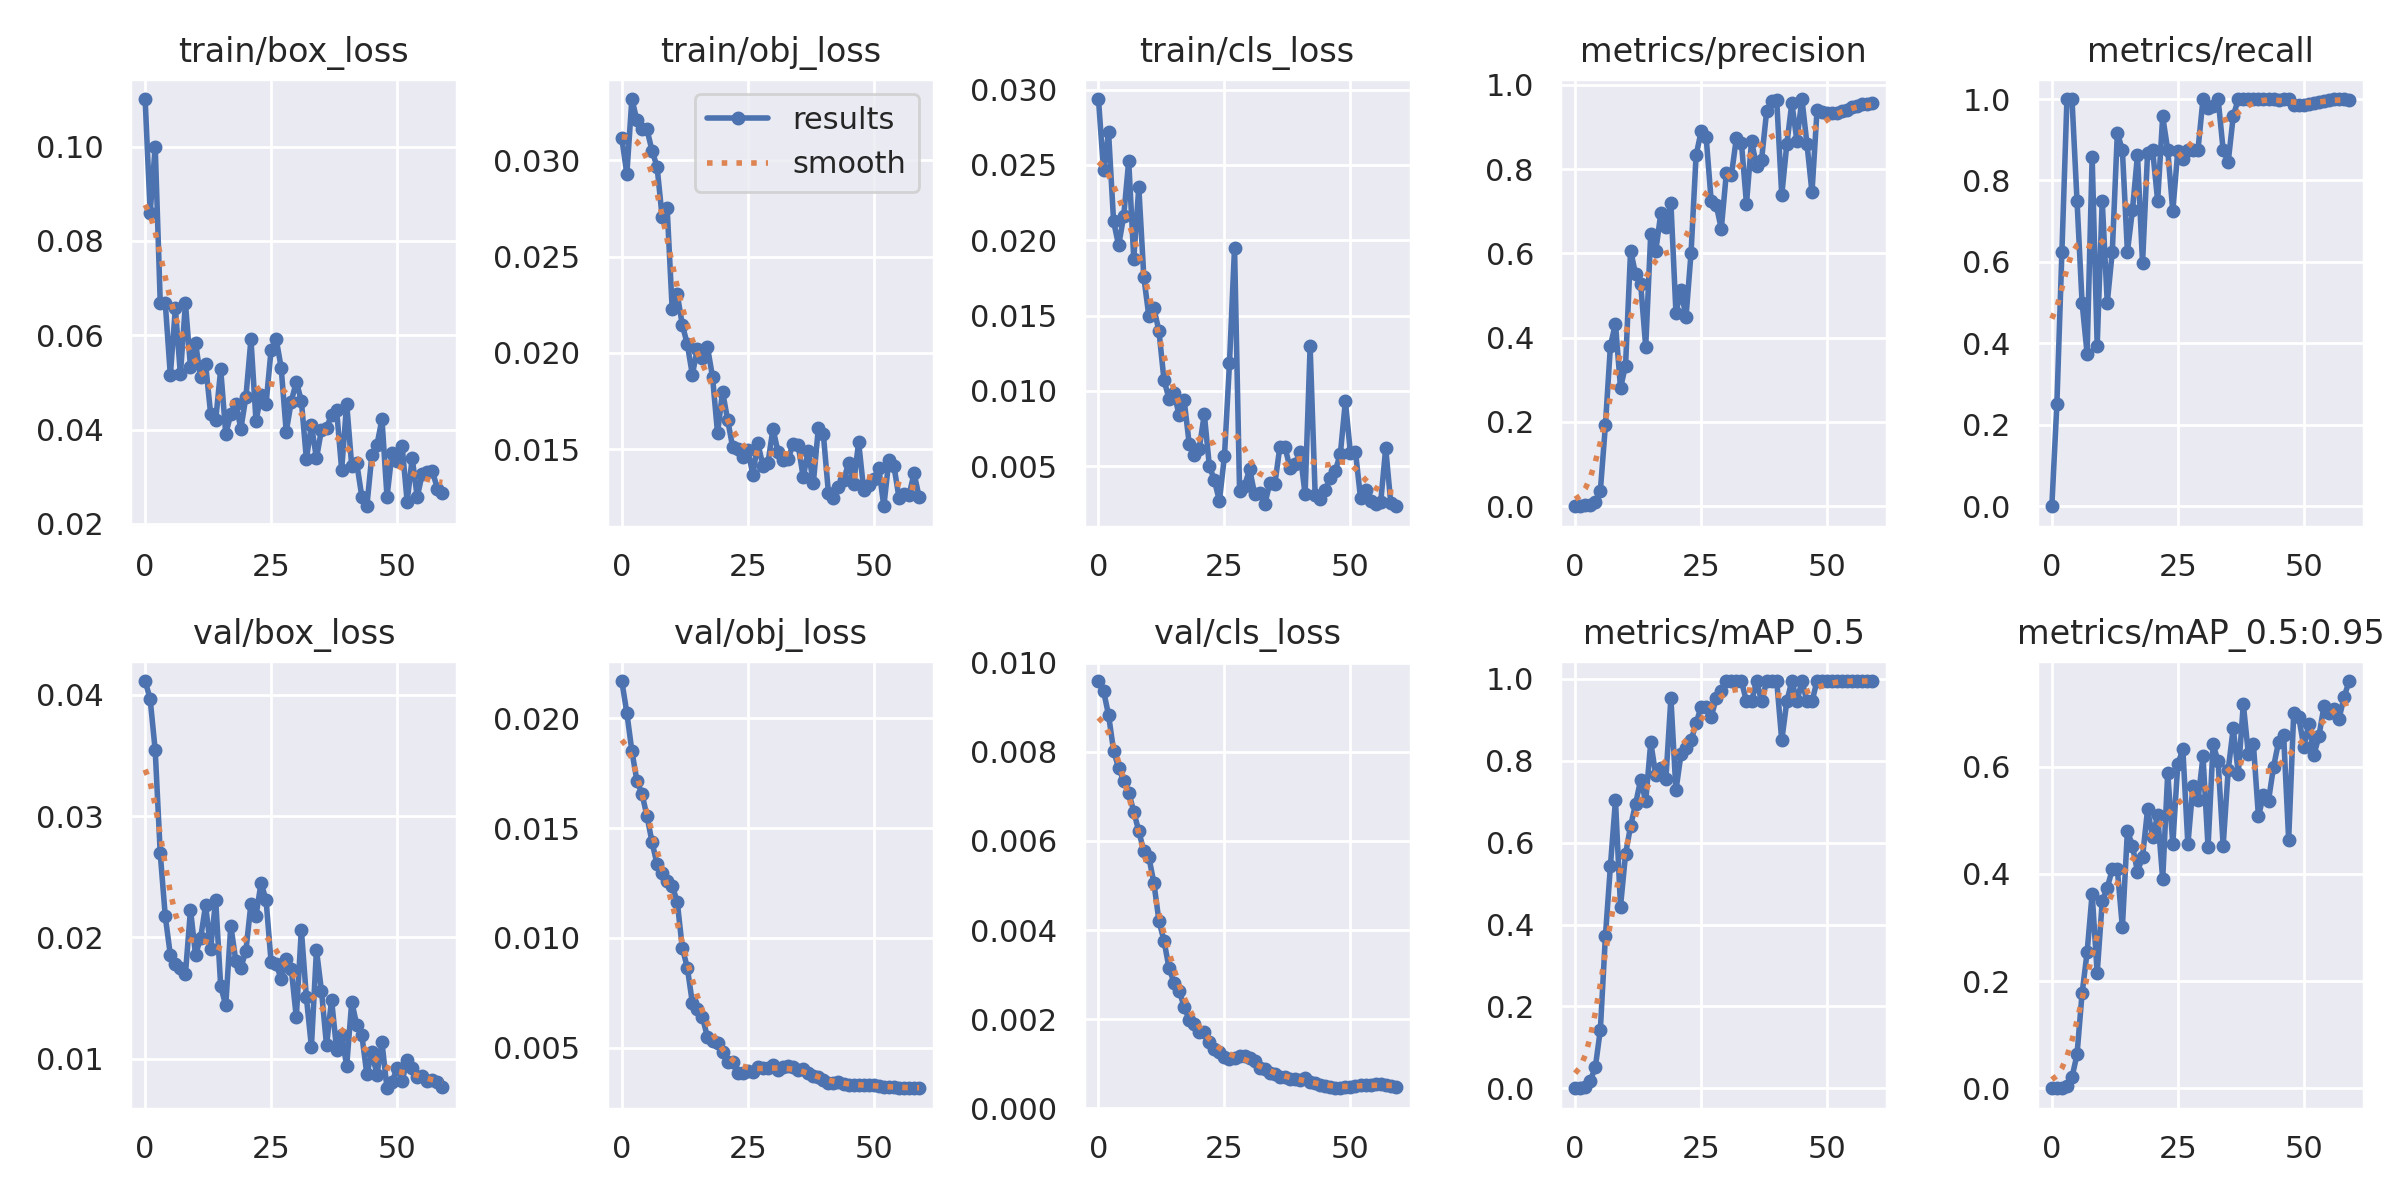

In [19]:
from IPython.display import Image, display

# Exibir gráfico de métricas
print("Gráfico de desempenho do modelo YOLOv5 (60 épocas):")
display(Image(filename='runs/train/veiculos_yolo_60ep/results.png', width=1200))


## 1. Aplicação da YOLOv5 Tradicional (Pré-treinada)

Nesta abordagem, utilizamos o modelo `yolov5s.pt` fornecido pela Ultralytics, sem ajustes no dataset customizado.

Este modelo já foi treinado em um grande conjunto de dados públicos (COCO dataset), o que lhe permite detectar diversas classes genéricas. O objetivo aqui é avaliar se ele é capaz de identificar **carros** e **motos** em nosso conjunto de teste, mesmo sem ter sido adaptado para essas imagens específicas.

Esta etapa também permite comparar como um modelo genérico se comporta frente a um modelo customizado, como o desenvolvido na Entrega 1.

In [20]:
import time

# Parâmetros utilizados:
# --weights: define o modelo YOLOv5 a ser utilizado (pré-treinado 'yolov5s.pt')
# --img: tamanho da imagem de entrada (640x640 pixels)
# --conf: nível mínimo de confiança para considerar uma detecção
# --source: diretório com as imagens do conjunto de teste
# --name: nome da pasta onde os resultados da inferência serão salvos (dentro de runs/detect/)

# Marca o início da execução
inicio = time.time()

# Executa a inferência com o modelo pré-treinado
!python detect.py \
  --weights yolov5s.pt \
  --img 640 \
  --conf 0.25 \
  --source /content/drive/MyDrive/1TIAOR20242_FASE6_CAP1/dataset_images/images/test \
  --name yolo_tradicional

# Marca o fim da execução e calcula a duração
fim = time.time()
print(f"Tempo de inferência com YOLO pré-treinado: {fim - inicio:.2f} segundos")


detect: weights=['yolov5s.pt'], source=/content/drive/MyDrive/1TIAOR20242_FASE6_CAP1/dataset_images/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolo_tradicional, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-411-gf4d8a84c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/8 /content/drive/MyDrive/1TIAOR20242_FASE6_CAP1/dataset_images/images/test/Imagem073.jpg: 480x640 3 cars, 1 motorcycle, 28.3ms
image 2/8 /content/drive/MyDrive/1TIAOR20242_FASE6_CAP1/dataset_images/images/test/Imagem074.jpeg: 544x640 1 train, 29.0ms
image 3/

### Visualização dos resultados da YOLOv5 Tradicional

Abaixo estão algumas imagens do conjunto de teste processadas pelo modelo pré-treinado YOLOv5s. O objetivo é observar quais objetos foram detectados, como foram classificados e se há consistência nas detecções para as classes de interesse (carro e moto).


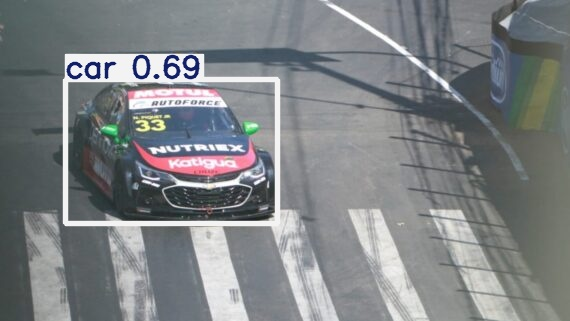

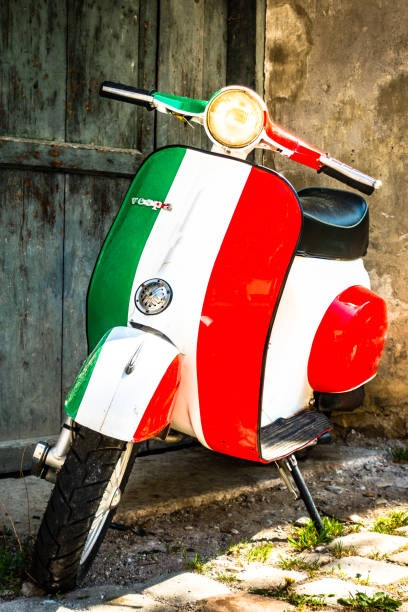

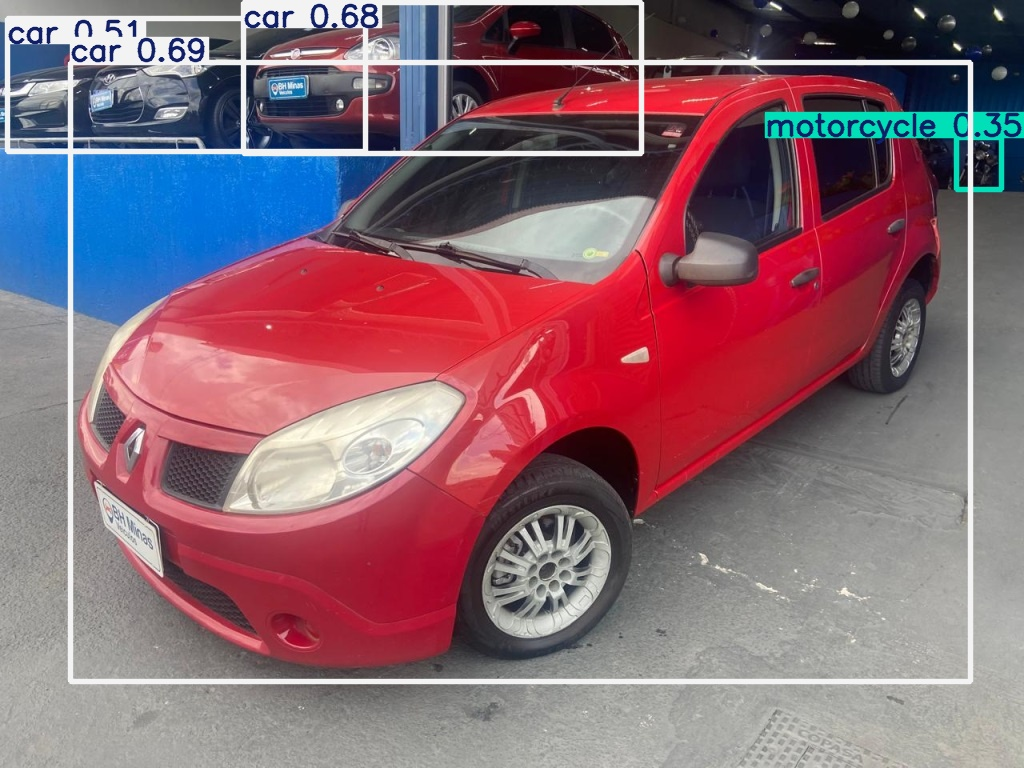

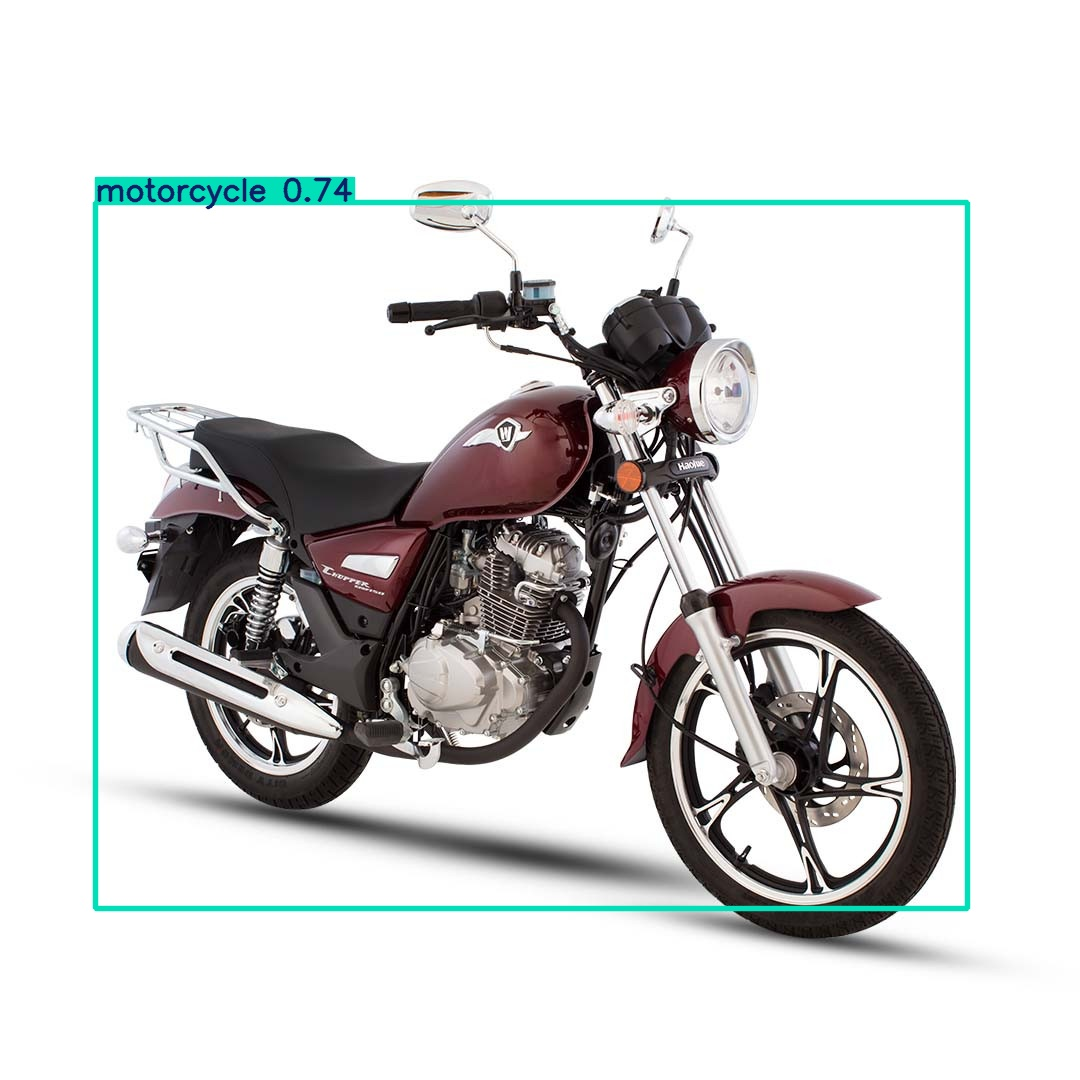

In [21]:
from IPython.display import Image, display
import glob

# Local dos resultados gerados pelo YOLO pré-treinado
imagens_yolo_tradicional = glob.glob('runs/detect/yolo_tradicional/*.jpg')

# Exibir até 4 imagens
for img_path in imagens_yolo_tradicional[:4]:
    display(Image(filename=img_path, width=500))


### Análise de desempenho do modelo YOLOv5 Tradicional (Pré-treinado)


Ao aplicar o modelo YOLOv5s pré-treinado (sem re-treinamento) sobre as imagens do conjunto de teste, foram observadas as seguintes características e comportamentos:

#### 🔹 Detecções realizadas
- O modelo foi capaz de detectar **carros** e **motos**, que são classes presentes no dataset COCO (base de treinamento do YOLOv5 pré-treinado).
- Em algumas imagens, foi capaz de detectar **mais de um objeto da mesma classe**, como múltiplos carros ou motos, demonstrando uma boa capacidade de identificação em ambientes com múltiplas ocorrências.
- Algumas imagens apresentaram **detecções incorretas ou irrelevantes**, como a classificação de "train" ou "truck", indicando limitações no foco da aplicação.

#### 🔹 Acertos e limitações por imagem
- **Imagem 073**: Detecção de 3 carros e 1 moto, indicando boa sensibilidade.
- **Imagem 074**: Detecção incorreta como "train", devido à vista traseira incomum do fusca.
- **Imagem 075**: Detecção correta de um carro.
- **Imagem 076**: Detecção como "truck" (possivelmente confundido com o design do Tesla Cybertruck).
- **Imagem 077**: Detecção correta de uma moto.
- **Imagem 078**: Detecção de 4 motos, indicando alta sensibilidade, mas possível excesso.
- **Imagem 079**: Detecção correta de uma moto.
- **Imagem 080**: Nenhuma detecção (moto tipo Vespa, possivelmente fora do padrão aprendido).

#### 🔹 Tempo de inferência
- O tempo total de inferência foi de aproximadamente **7,84 segundos** para processar as 8 imagens do conjunto de teste.
- A média de tempo por imagem foi de aproximadamente **23,8 ms de inferência** e **18,7 ms de NMS**, o que representa uma performance adequada para aplicações em tempo real ou embarcadas.

#### 🔹 Robustez e generalização
- O modelo demonstrou **capacidade de generalizar** bem para contextos diversos, sendo capaz de detectar objetos mesmo em imagens não padronizadas.
- A presença de falsos positivos e detecções de classes fora do escopo do projeto reforça o caráter **genérico** do modelo.

Esses resultados demonstram que o modelo YOLOv5 pré-treinado, mesmo sem ajustes, consegue fornecer **resultados relevantes** em ambientes variados, desde que as classes estejam contempladas em seu conjunto de treinamento original.


### Conclusão parcial – YOLOv5 Tradicional (Pré-treinado)

O modelo YOLOv5s pré-treinado, utilizado sem re-treinamento, apresentou um desempenho satisfatório ao ser aplicado diretamente sobre as imagens do conjunto de teste do projeto.

Mesmo sem ter sido treinado com o dataset específico, o modelo foi capaz de detectar corretamente diversas ocorrências das classes "car" e "motorcycle", mostrando uma boa generalização para objetos presentes em seu dataset original (COCO).

Além disso, o modelo demonstrou:
- **Capacidade de identificar múltiplos objetos por imagem**, o que é relevante em ambientes complexos.
- **Tempo de inferência adequado** (7,84 segundos para 8 imagens), tornando-o viável para aplicações práticas.
- **Alguns falsos positivos ou classificações irrelevantes**, como "train" e "truck", esperados em um modelo genérico.

Por outro lado, a detecção incorreta de objetos incomuns (como o Tesla Cybertruck ou a traseira aberta de um fusca) e a ausência de detecção em casos menos padronizados (como a moto Vespa) indicam **limitações relacionadas à representatividade do dataset de origem** e à falta de especialização no domínio do projeto.

Em resumo, o YOLO pré-treinado é uma ferramenta prática e eficaz para uso geral, oferecendo bons resultados iniciais mesmo sem personalização. No entanto, **pode não atender com a precisão exigida em contextos específicos**, como os esperados por um cliente com necessidades claramente definidas.


## 2. Classificação com CNN do Zero (Carro vs Moto)



Nesta etapa, será implementada uma rede neural convolucional simples, treinada do zero para classificar imagens entre duas categorias: "carro" e "moto".

Diferente do modelo YOLO, que realiza detecção de objetos, a CNN será responsável apenas pela **classificação da imagem como um todo**, com base em características visuais.

Para isso, utilizaremos as mesmas imagens da Entrega 1, reestruturando o dataset para seguir o padrão esperado por bibliotecas como `ImageDataGenerator` (Keras) ou `ImageFolder` (PyTorch).

A estrutura esperada do diretório de dados é a seguinte:

```
📦 1TIAOR20242_FASE6_CAP1
│── 📁 dataset_cnn           # Pasta principal para classificação com CNN
│   ├── 📁 train             # Imagens utilizadas para o treinamento (64 imagens por classe)
│   │   ├── 📁 carro         # Imagens da classe "carro"
│   │   ├── 📁 moto          # Imagens da classe "moto"
│   ├── 📁 val               # Imagens utilizadas para validação (8 imagens por classe)
│   │   ├── 📁 carro         # Imagens da classe "carro"
│   │   ├── 📁 moto          # Imagens da classe "moto"
│   ├── 📁 test              Imagens utilizadas para avaliação final (8 imagens por classe)
│   │   ├── 📁 carro         # Imagens da classe "carro"
│   │   ├── 📁 moto          # Imagens da classe "moto"
```

Com essa organização, é possível carregar as imagens automaticamente com os respectivos rótulos, simplificando o processo de preparação do dataset para a CNN.

### Verificação e montagem do Google Drive

Antes de carregar o dataset da CNN, verificamos se o Google Drive está montado no ambiente do Google Colab.

Essa etapa é essencial, pois o ambiente pode ter sido reiniciado e a conexão com o Drive perdida desde a execução da Entrega 1.


In [2]:
import os
from google.colab import drive

# Verifica se o Google Drive já está montado
if not os.path.exists('/content/drive/MyDrive'):
    print("🔄 Google Drive não está montado. Montando agora...")
    drive.mount('/content/drive')
else:
    drive.mount('/content/drive', force_remount=True)
    print("✅ Google Drive já está montado.")


Mounted at /content/drive
✅ Google Drive já está montado.


### Carregamento do dataset a partir do Google Drive

Com o dataset já estruturado na pasta `dataset_cnn` dentro do Google Drive, vamos utilizar a biblioteca `ImageDataGenerator` da Keras para carregar e preparar os dados para treinamento, validação e teste.

O carregamento será feito com base na estrutura de subpastas (`carro/` e `moto/`) já organizadas dentro dos diretórios `train`, `val` e `test`.

O caminho completo do dataset no Google Drive deve ser:
```
/content/drive/MyDrive/1TIAOR20242_FASE6_CAP1/dataset_cnn/
```

Cada subpasta dentro de `train/`, `val/` e `test/` representa o rótulo da classe correspondente.

In [3]:
import os

# Caminho que estamos tentando usar
base_path = "/content/drive/MyDrive/1TIAOR20242_FASE6_CAP1"

# Verificar o conteúdo da pasta principal
print("📁 Conteúdo da pasta principal:")
print(os.listdir(base_path))

# Se dataset_cnn existir, listar os subdiretórios de train
if "dataset_cnn" in os.listdir(base_path):
    print("\n📁 Subpastas dentro de dataset_cnn:")
    print(os.listdir(f"{base_path}/dataset_cnn"))


📁 Conteúdo da pasta principal:
['dataset_images', 'veiculos.yaml', 'dataset_cnn']

📁 Subpastas dentro de dataset_cnn:
['test', 'train', 'val']


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Caminho base no Google Drive
dataset_dir = "/content/drive/MyDrive/1TIAOR20242_FASE6_CAP1/dataset_cnn"

# Tamanhos e parâmetros
image_size = (224, 224)
batch_size = 16

# Pré-processamento básico: reescala os pixels para o intervalo [0, 1]
datagen = ImageDataGenerator(rescale=1./255)

# Carregamento dos dados
train_generator = datagen.flow_from_directory(
    directory=f"{dataset_dir}/train",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'  # classificação binária
)

val_generator = datagen.flow_from_directory(
    directory=f"{dataset_dir}/val",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    directory=f"{dataset_dir}/test",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # importante para avaliação
)


Found 64 images belonging to 2 classes.
Found 8 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


## Definição da CNN (Rede Neural Convolucional)

A rede definida a seguir tem como objetivo classificar imagens entre duas categorias: "carro" e "moto".

Trata-se de uma arquitetura simples, ideal para bases de dados menores como a utilizada neste projeto. A rede é composta por:

- Três blocos de camadas convolucionais + max pooling;
- Camada de flatten (achatar os filtros);
- Duas camadas densas (fully connected), sendo a última com ativação sigmoide para classificação binária.

A perda será calculada com `binary_crossentropy`, e a métrica principal será a **acurácia**.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Arquitetura da CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # Saída binária: 0 ou 1
])

# Compilação do modelo
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Resumo do modelo
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

### Treinamento do modelo CNN



Com os dados devidamente organizados e carregados, o modelo convolucional será treinado por um número definido de épocas.

Durante o treinamento, serão observadas as métricas de acurácia e perda (**loss**) tanto para o conjunto de **treinamento** quanto para o de **validação**, com o objetivo de identificar a evolução do aprendizado da rede e eventuais indícios de overfitting.

Como o conjunto de dados é relativamente pequeno, utilizaremos um número moderado de épocas, evitando o risco de sobreajuste. Os resultados serão registrados para posterior análise comparativa com as abordagens baseadas em YOLO.


In [6]:
import tensorflow as tf
print("GPU disponível:", tf.config.list_physical_devices('GPU'))


GPU disponível: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [9]:
print("🔍 Dimensão do batch de treino:", train_generator.image_shape)
print("🔢 Classes detectadas:", train_generator.class_indices)


🔍 Dimensão do batch de treino: (224, 224, 3)
🔢 Classes detectadas: {'carro': 0, 'moto': 1}


In [8]:
import matplotlib.pyplot as plt

# Parâmetros
epochs = 30

# Treinamento do modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    verbose=1
)

Epoch 1/30


FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-7-b6ff484eef09>", line 7, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_2147]

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Acurácia Treino')
    plt.plot(epochs_range, val_acc, label='Acurácia Validação')
    plt.legend(loc='lower right')
    plt.title('Acurácia durante o treinamento')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Perda Treino')
    plt.plot(epochs_range, val_loss, label='Perda Validação')
    plt.legend(loc='upper right')
    plt.title('Perda durante o treinamento')

    plt.show()

plot_training_history(history)


## COMPARATIVO DOS MODELOS